In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
file='G:/EdData/census_income.csv'

ci=pd.read_csv(file)
ci=ci.sample(1000, random_state=2)

In [3]:
ci.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
16054,42,State-gov,160369,HS-grad,9,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,>50K
32382,44,Local-gov,150171,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
10749,39,Local-gov,256997,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15377,39,Private,147548,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
29660,29,Federal-gov,106179,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Female,0,1408,40,United-States,<=50K


In [4]:
ci.drop(['education'],axis=1,inplace=True)
ci['Y']=(ci['Y']==' >50K').astype(int)
cat_cols=ci.select_dtypes(['object']).columns

for col in cat_cols:
    freqs=ci[col].value_counts()
    k=freqs.index[freqs>10][:-1]
    for cat in k:
        name=col+'_'+cat
        ci[name]=(ci[col]==cat).astype(int)
    del ci[col]

x=ci.drop(['Y'],1)
y=ci['Y']

In [5]:
y.value_counts()

0    765
1    235
Name: Y, dtype: int64

In [6]:
rf=RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 14, 'max_features': 11, 'n_estimators': 320})

In [7]:
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=14, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=320,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [9]:
from eli5 import show_weights, show_prediction

Using TensorFlow backend.


In [10]:
x.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_ Private,workclass_ Local-gov,workclass_ Self-emp-not-inc,workclass_ State-gov,...,relationship_ Not-in-family,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ White,race_ Black,race_ Asian-Pac-Islander,sex_ Male,native.country_ United-States,native.country_ ?
16054,42,160369,9,0,0,40,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
32382,44,150171,9,0,0,40,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
10749,39,256997,13,0,0,40,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
15377,39,147548,9,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
29660,29,106179,10,0,1408,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [11]:
feature_names = list(x.columns)

In [12]:
# GLobal level interpretation
show_weights(rf, feature_names =feature_names, top=150)

Weight,Feature
0.1145 ± 0.1986,marital.status_ Married-civ-spouse
0.1125 ± 0.0591,education.num
0.1109 ± 0.0692,age
0.1101 ± 0.0708,capital.gain
0.1075 ± 0.0586,fnlwgt
0.0759 ± 0.0521,hours.per.week
0.0746 ± 0.1761,relationship_ Husband
0.0371 ± 0.0319,capital.loss
0.0318 ± 0.0994,marital.status_ Never-married
0.0313 ± 0.0328,occupation_ Exec-managerial


In [13]:
# Local level interpretation

show_prediction(rf, x.loc[16054], feature_names =feature_names, show_feature_values=True)

In [14]:
show_prediction(rf, x.loc[32382], feature_names =feature_names, show_feature_values=True)

# Permutation Importance

In [15]:
from eli5.sklearn import PermutationImportance

In [16]:
permuter = PermutationImportance(rf, scoring='roc_auc', cv='prefit', n_iter=2, random_state=42)#instantiate permuter object
permuter.fit(x.values, y)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=14,
                                                       max_features=11,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fract

In [17]:
show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.0353 ± 0.0011,education.num
0.0248 ± 0.0032,capital.gain
0.0211 ± 0.0012,marital.status_ Married-civ-spouse
0.0138 ± 0.0007,fnlwgt
0.0135 ± 0.0018,hours.per.week
0.0132 ± 0.0007,age
0.0074 ± 0.0032,capital.loss
0.0067 ± 0.0004,occupation_ Exec-managerial
0.0036 ± 0.0009,relationship_ Husband
0.0007 ± 0.0003,occupation_ Craft-repair


In [18]:
mask = permuter.feature_importances_ > 0 
features = x.columns[mask]
features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_ Private', 'workclass_ Local-gov',
       'workclass_ Self-emp-not-inc', 'workclass_ State-gov',
       'workclass_ Federal-gov', 'workclass_ ?',
       'marital.status_ Married-civ-spouse', 'marital.status_ Never-married',
       'marital.status_ Divorced', 'marital.status_ Separated',
       'occupation_ Prof-specialty', 'occupation_ Adm-clerical',
       'occupation_ Exec-managerial', 'occupation_ Craft-repair',
       'occupation_ Sales', 'occupation_ Other-service',
       'occupation_ Machine-op-inspct', 'occupation_ Transport-moving',
       'occupation_ Handlers-cleaners', 'occupation_ ?',
       'occupation_ Tech-support', 'occupation_ Protective-serv',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ White', 'race_ Black',
       'race_ Asian-Pac-Islander', 's

In [20]:
print(x.shape[1])
print(len(features))

40
39


# Partial Dependence Plots

In [21]:
from pdpbox import pdp, info_plots# Create the data that we will plot

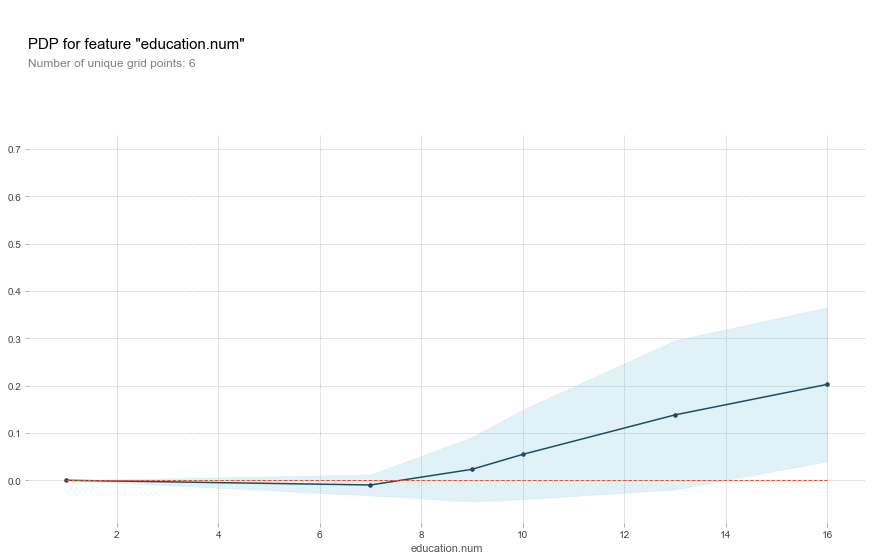

In [22]:
var = 'education.num'
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x, model_features=feature_names, feature=var)# plot it
pdp.pdp_plot(pdp_goals, var)
plt.show()

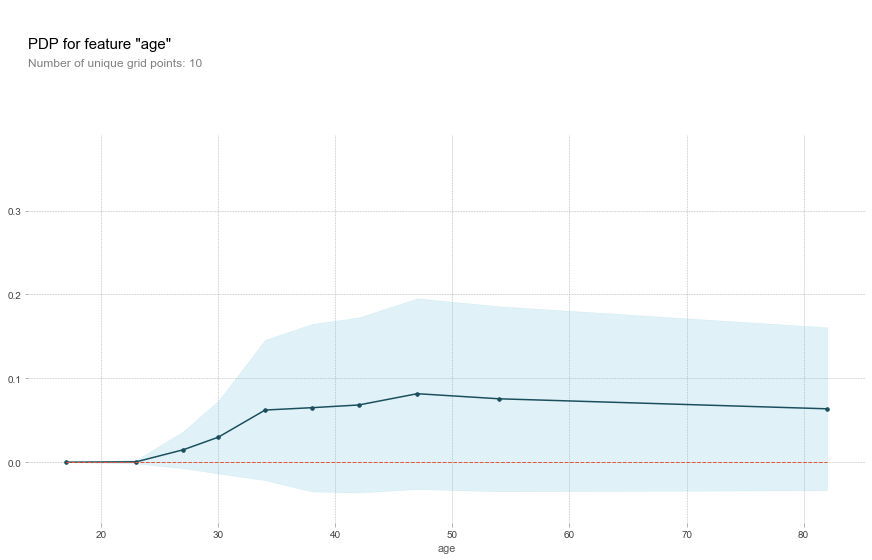

In [23]:
var = 'age'
pdp_goals = pdp.pdp_isolate(model=rf, dataset=x, model_features=feature_names, feature=var)# plot it
pdp.pdp_plot(pdp_goals, var)
plt.show()

# Skater

In [ ]:
# !pip install skater
# if you face an issue with this you can download skater master from here :https://github.com/oracle/Skater
# go that folder on your command prompt and run 
# python setup.py install
# also if you build skater like that , you'll need to restart your kernel for imports to start working

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [ ]:
interpreter = Interpretation(x, feature_names=x.columns)
model = InMemoryModel(rf.predict_proba, examples=x)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [ ]:
?interpreter.feature_importance.plot_feature_importance

In [ ]:
rf.classes_

In [ ]:
pyint_model = InMemoryModel(rf.predict_proba, examples=x, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['education.num'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


In [ ]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['age'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
model = InMemoryModel(rf.predict_proba, examples=x, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('age', 'education.num')], model, 
                                                       grid_resolution=10)

In [ ]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.util.dataops import show_in_notebook
exp = LimeTabularExplainer(x.values, 
                           feature_names=x.columns, 
                           discretize_continuous=True, 
                           class_names=['Y_0', 'Y_1'])
exp.explain_instance(x.iloc[10].values, rf.predict_proba).show_in_notebook()

In [ ]:
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate

# Using the interpreter instance invoke call to the TreeSurrogate
surrogate_explainer = interpreter.tree_surrogate(oracle=model,max_depth=4)
y_pred_rf=rf.predict(x)
surrogate_explainer.fit(x, y_pred_rf, use_oracle=True, prune='post', scorer_type='default')

In [ ]:
# if you get graphviz error on mac : please install by running this : sudo brew install graphviz
# if that gives error for brew not found , install homebrew
surrogate_explainer.plot_global_decisions(colors=['coral', 'lightsteelblue','darkkhaki'],
                                          file_name='simple_tree_pre.png')

In [ ]:
show_in_notebook('simple_tree_pre.png', width=400, height=300)

In [ ]:
dict(enumerate(x.columns))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(rf.predict(x),y)

In [ ]:
accuracy_score(surrogate_explainer.predict(x),y)